In [3]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-9ky2wo10/fbprophet_eae90679f7bc45c3802de3f16d1fea92/setup.py'"'"'; __file__='"'"'/tmp/pip-install-9ky2wo10/fbprophet_eae90679f7bc45c3802de3f16d1fea92/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'fr

In [7]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 90 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637968 sha256=c63fc6a5cd5977e201fcfa77c30039543fc114a64774504cc6e6a52257a548bf
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [8]:
import fbprophet
from fbprophet import Prophet

In [9]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [10]:
import pandas as pd
df=pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
df.shape

(49068, 10)

In [13]:
df.isnull().sum()#Check null values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [14]:
df.dtypes#check data type

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [15]:
#Date is in the object formet so need to change it into the Date type
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.dtypes#again check the types,of data

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [17]:
#Dates' # of unique 
df['Date'].nunique()

188

In [19]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [21]:
#If we want to work with fbprophet , we have to change date column as ds and target variable as y
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [22]:
#Create model
m=Prophet()

In [23]:
model=m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [25]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_data=model.make_future_dataframe(periods=30,freq='D')
future_data.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [26]:
df_prophet.shape#originals shape

(188, 5)

In [27]:
future_data.shape

(218, 1)

In [30]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [31]:
future_data.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [32]:
### now do Prediction on future_data
prediction=model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.231372e+05,8.642956e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.078191e+05,1.014456e+05,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-9.574116e+04,1.119287e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.766512e+04,1.165445e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.888756e+04,1.170863e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.107975e+07,2.183689e+07,2.108425e+07,2.180768e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.125210e+07,2.205706e+07,2.126780e+07,2.203170e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.143665e+07,2.226796e+07,2.145240e+07,2.225927e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.160229e+07,2.248127e+07,2.163051e+07,2.249065e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [33]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.107975e+07,2.183689e+07
214,2020-08-23,2.165304e+07,2.125210e+07,2.205706e+07
215,2020-08-24,2.184773e+07,2.143665e+07,2.226796e+07
216,2020-08-25,2.203715e+07,2.160229e+07,2.248127e+07
217,2020-08-26,2.224712e+07,2.176801e+07,2.272090e+07


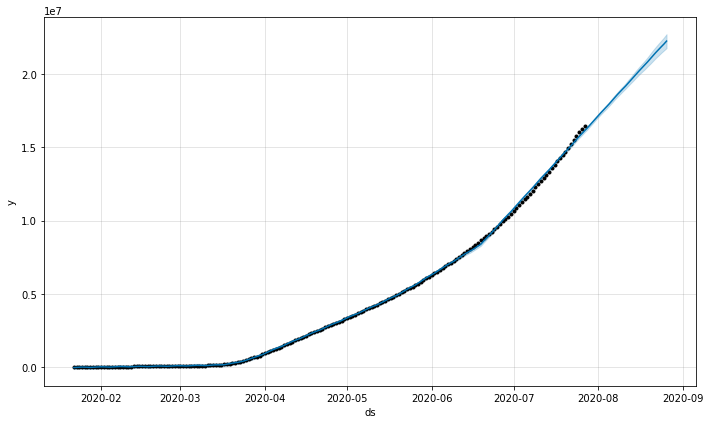

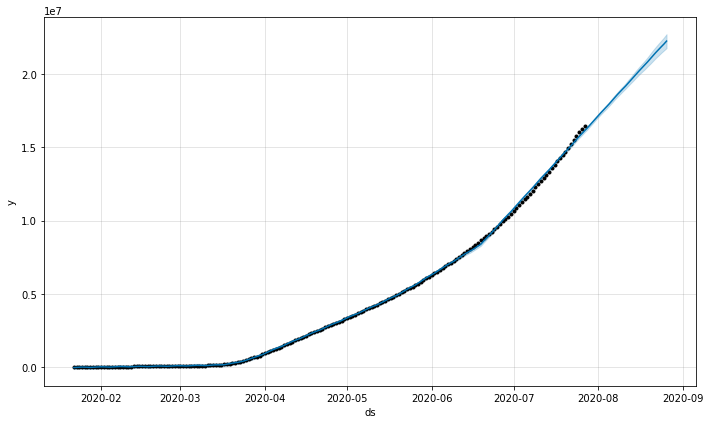

In [34]:
#### plot the predictions we will see these are with respect to yhat
model.plot(prediction)

In [35]:
### Conclusion:According to the graph covid cases will increase in the future

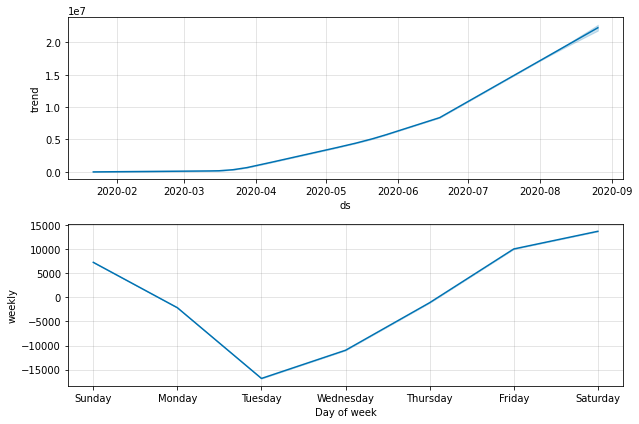

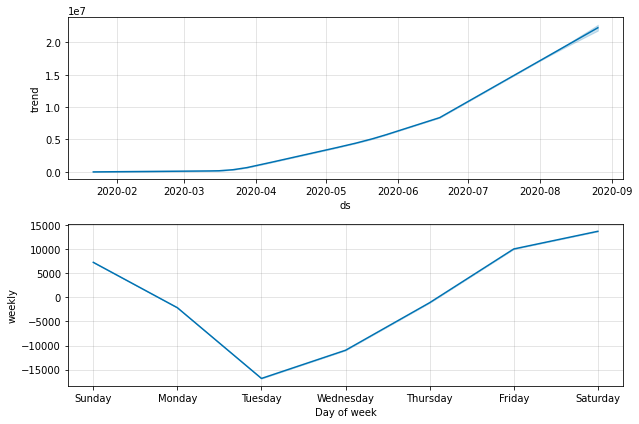

In [36]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

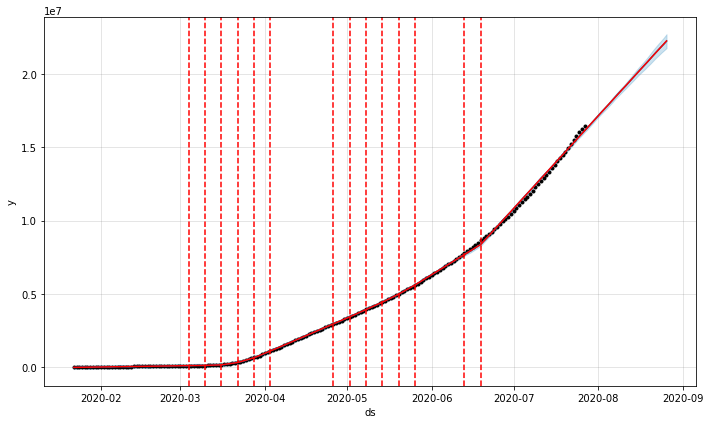

In [38]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot
fig=model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [39]:
#How to cross validate in fbprophet +++ It has prebuild library to cross validate
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate
## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}


INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196005e+06,3.206303e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279168e+06,3.291668e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361943e+06,3.376803e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439185e+06,3.461609e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513862e+06,3.545863e+06,3515244,2020-04-28


In [41]:
df_cv.shape

(150, 6)

##performance_metrics utility to compute the 

:Mean Squared Error(MSE)
:Root Mean Squared Error(RMSE)
:Mean Absolute Error(MAE)
:Mean Absolute Percentage Error(MAPE)
:the coverage of the the yhat_lower and yhat_upper estimates.

In [43]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


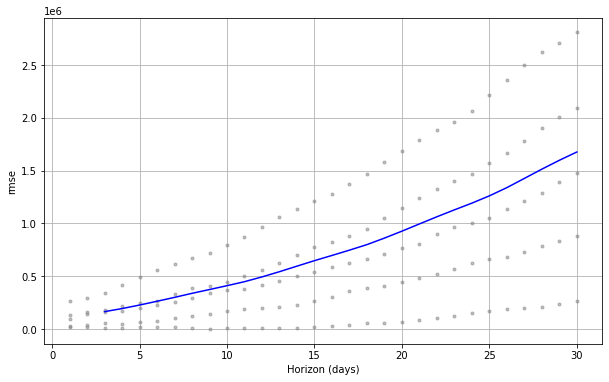

In [44]:
from fbprophet.plot import plot_cross_validation_metric
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


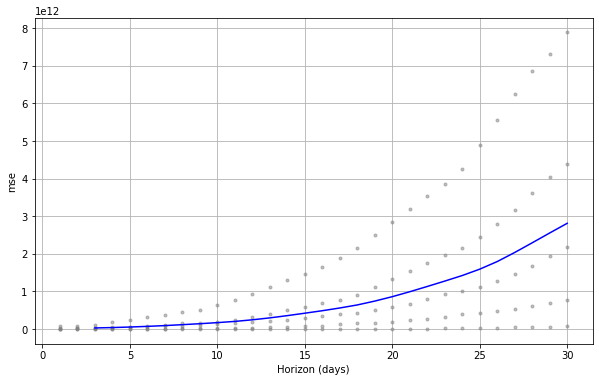

In [45]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


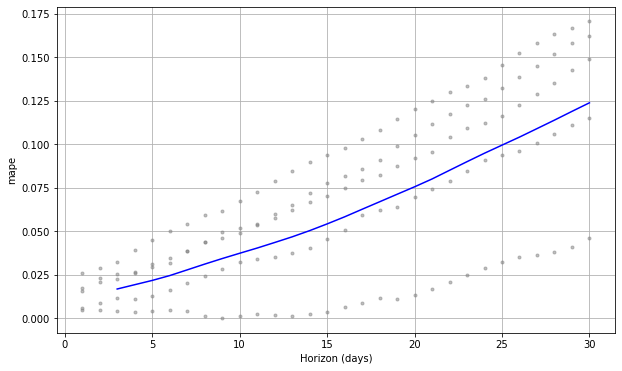

In [46]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')